## Importacion de librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

## Lectura de los datos

Se usa el metodo `.read_csv()`, para leer el aarchivo que contiene los datos en formato csv.

Adicionamos el parametro `index_col` al metodo, que nos permite decirle a **Pandas** que columna queremos que sea el indice de las filas.  

In [2]:
df = pd.read_csv("../data/covid_data.csv", delimiter=';', index_col="Country")
df.head()

,State,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,10/22/20,10/23/20,10/24/20,10/25/20,10/26/20,10/27/20,10/28/20,10/29/20,10/30/20,10/31/20
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,0 0,0 0,0 0,0 0,0 0,0 0,0 0,0 0,0 0,...,40626 1505,40687 1507,40768 1511,40833 1514,40937 1518,41032 1523,41145 1529,41268 1532,41334 1533,41425 1536
Albania,NaN,0 0,0 0,0 0,0 0,0 0,0 0,0 0,0 0,0 0,...,18250 465,18556 469,18858 473,19157 477,19445 480,19729 487,20040 493,20315 499,20634 502,20875 509
Algeria,NaN,0 0,0 0,0 0,0 0,0 0,0 0,0 0,0 0,0 0,...,55357 1888,55630 1897,55880 1907,56143 1914,56419 1922,56706 1931,57026 1941,57332 1949,57651 1956,57942 1964
Andorra,NaN,0 0,0 0,0 0,0 0,0 0,0 0,0 0,0 0,0 0,...,3811 63,4038 69,4038 69,4038 69,4325 72,4410 72,4517 72,4567 73,4665 75,4756 75
Angola,NaN,0 0,0 0,0 0,0 0,0 0,0 0,0 0,0 0,0 0,...,8582 260,8829 265,9026 267,9381 268,9644 270,9871 271,10074 275,10269 275,10558 279,10805 284


### Error en columnas
Se identifico que existe un posible error dentro del nombre de las columnas, existen columnas en formato `mm/dd/yy` y otras en formato `yyyy-mm-dd`, las primeras pertenecen al peridodo del anio 2020, y las otras a periodos anteriores al anio 2020.

Teniendo en cuenta el objetivo del proyecto se determino que las columnas con fechas en formato `yyyy-mm-dd`, que perteneces a periodos anteriores al anio 2020, sean omitidas de los datos a usar.

Si se imprime `df.columns`, se puede observar que existen **285 columnas** incluida la columna de *"State"*.

In [3]:
df.columns

Index(['State', '1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20',
       '1/27/20', '1/28/20', '1/29/20', '1/30/20',
       ...
       '10/22/20', '10/23/20', '10/24/20', '10/25/20', '10/26/20', '10/27/20',
       '10/28/20', '10/29/20', '10/30/20', '10/31/20'],
      dtype='object', length=285)

Se crea `columnsClear` una lista que contendra unicamente los indices de las columnas que cumplan con el formato `mm-dd-yyyy`.

> Adicionalmente se inicializa `columnsClear = [0,]` con la finalidad de que el indice de la columna *"State"* se contemple dentro de las columnas que se requiere mantener.

In [4]:
columnsClear = [0,]
patternColumn = re.compile(r"(\d+)/(\d+)/(\d+)")
columns = df.columns

for i in range(1, len(columns)):
    if patternColumn.match(columns[i]):
        columnsClear.append(i)

Una vez se obtienen los indices de las columnas correctas, tenemos como resultado: 

In [5]:
print(f"Numero de columnas nuevas: {len(columnsClear)}")

Numero de columnas nuevas: 285


Se obtiene una reduccion de **108** columnas erroneas.

Se corrigio el error a **0** columnas erroneas.

### Correccion del error
Se realiza una extraccion de datos del `DataFrame` original, mediante el metodo `.iloc[rows, columns]` .

In [6]:
df_clean = df.iloc[:,columnsClear]
df_clean.head()

,State,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,10/22/20,10/23/20,10/24/20,10/25/20,10/26/20,10/27/20,10/28/20,10/29/20,10/30/20,10/31/20
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,0 0,0 0,0 0,0 0,0 0,0 0,0 0,0 0,0 0,...,40626 1505,40687 1507,40768 1511,40833 1514,40937 1518,41032 1523,41145 1529,41268 1532,41334 1533,41425 1536
Albania,NaN,0 0,0 0,0 0,0 0,0 0,0 0,0 0,0 0,0 0,...,18250 465,18556 469,18858 473,19157 477,19445 480,19729 487,20040 493,20315 499,20634 502,20875 509
Algeria,NaN,0 0,0 0,0 0,0 0,0 0,0 0,0 0,0 0,0 0,...,55357 1888,55630 1897,55880 1907,56143 1914,56419 1922,56706 1931,57026 1941,57332 1949,57651 1956,57942 1964
Andorra,NaN,0 0,0 0,0 0,0 0,0 0,0 0,0 0,0 0,0 0,...,3811 63,4038 69,4038 69,4038 69,4325 72,4410 72,4517 72,4567 73,4665 75,4756 75
Angola,NaN,0 0,0 0,0 0,0 0,0 0,0 0,0 0,0 0,0 0,...,8582 260,8829 265,9026 267,9381 268,9644 270,9871 271,10074 275,10269 275,10558 279,10805 284


## Tratamiento de datos
Se identifica que los valores se encuntran en un string en formato `[numero][n spacios][numero]`, usando una expresion regular se extraen los valores y se convierten en tuplas `(contagios, muertes)`, despues se extrae cada uno de estos valores en una columan distinta.

### Definicion de la funcion

In [7]:
patternValues = re.compile(r"(\d+)(\s+)(\d+)")

def extractValue(value, pos=0):
    matchValues = patternValues.match(value)
    infections, _, deaths = matchValues.groups()
    infections = int(infections)
    deaths = int(deaths)
    return infections, deaths

Se applica la funcion a todo el `DataFrame` exepto la columna *"State"*.

In [8]:
df_clean.iloc[:,1:] = df_clean.iloc[:,1:].applymap(lambda x: extractValue(x))
df_clean.head()

,State,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,10/22/20,10/23/20,10/24/20,10/25/20,10/26/20,10/27/20,10/28/20,10/29/20,10/30/20,10/31/20
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,"(0, 0)","(0, 0)","(0, 0)","(0, 0)","(0, 0)","(0, 0)","(0, 0)","(0, 0)","(0, 0)",...,"(40626, 1505)","(40687, 1507)","(40768, 1511)","(40833, 1514)","(40937, 1518)","(41032, 1523)","(41145, 1529)","(41268, 1532)","(41334, 1533)","(41425, 1536)"
Albania,NaN,"(0, 0)","(0, 0)","(0, 0)","(0, 0)","(0, 0)","(0, 0)","(0, 0)","(0, 0)","(0, 0)",...,"(18250, 465)","(18556, 469)","(18858, 473)","(19157, 477)","(19445, 480)","(19729, 487)","(20040, 493)","(20315, 499)","(20634, 502)","(20875, 509)"
Algeria,NaN,"(0, 0)","(0, 0)","(0, 0)","(0, 0)","(0, 0)","(0, 0)","(0, 0)","(0, 0)","(0, 0)",...,"(55357, 1888)","(55630, 1897)","(55880, 1907)","(56143, 1914)","(56419, 1922)","(56706, 1931)","(57026, 1941)","(57332, 1949)","(57651, 1956)","(57942, 1964)"
Andorra,NaN,"(0, 0)","(0, 0)","(0, 0)","(0, 0)","(0, 0)","(0, 0)","(0, 0)","(0, 0)","(0, 0)",...,"(3811, 63)","(4038, 69)","(4038, 69)","(4038, 69)","(4325, 72)","(4410, 72)","(4517, 72)","(4567, 73)","(4665, 75)","(4756, 75)"
Angola,NaN,"(0, 0)","(0, 0)","(0, 0)","(0, 0)","(0, 0)","(0, 0)","(0, 0)","(0, 0)","(0, 0)",...,"(8582, 260)","(8829, 265)","(9026, 267)","(9381, 268)","(9644, 270)","(9871, 271)","(10074, 275)","(10269, 275)","(10558, 279)","(10805, 284)"


## Graficacion de datos

In [9]:
def getNewDataFrameFromCountry(serie: pd.Series):
    data = {"infections": [], "deaths": []}

    for values in serie:
        data["infections"].append(values[0])
        data["deaths"].append(values[1])
    
    return pd.DataFrame(data, index=serie.index)


In [10]:
sampleGroup = df_clean.loc["Spain"][1:]
sampleGroup

1/22/20               (0, 0)
1/23/20               (0, 0)
1/24/20               (0, 0)
1/25/20               (0, 0)
1/26/20               (0, 0)
                  ...       
10/27/20    (1116738, 35298)
10/28/20    (1136503, 35466)
10/29/20    (1160083, 35639)
10/30/20    (1185678, 35878)
10/31/20    (1185678, 35878)
Name: Spain, Length: 284, dtype: object

In [11]:
sampleData = getNewDataFrameFromCountry(sampleGroup)
sampleData

,infections,deaths
1/22/20,0,0
1/23/20,0,0
1/24/20,0,0
1/25/20,0,0
1/26/20,0,0
...,...,...
10/27/20,1116738,35298
10/28/20,1136503,35466
10/29/20,1160083,35639
10/30/20,1185678,35878


In [12]:
xLabels = [f"{i}/1/20" for i in range(1, 13)]
xLabels

['1/1/20',
 '2/1/20',
 '3/1/20',
 '4/1/20',
 '5/1/20',
 '6/1/20',
 '7/1/20',
 '8/1/20',
 '9/1/20',
 '10/1/20',
 '11/1/20',
 '12/1/20']

In [13]:
title = f"Daily number of Cases and Deaths in {sampleGroup.name} (14-day mean)"

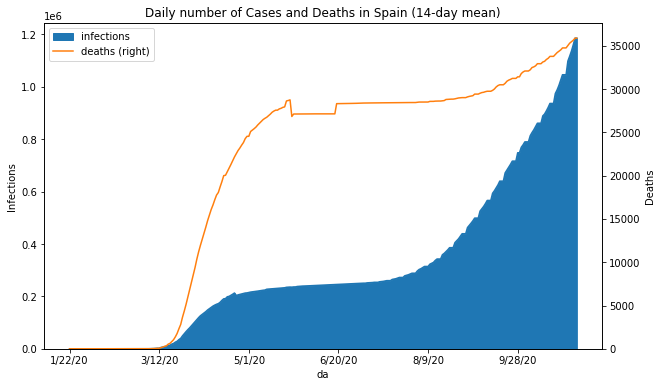

In [14]:
plt.figure(figsize=(10, 6),)
plt.title(title)

afgI= sampleData.infections.plot( x=xLabels, kind="area", legend=True)
afgI.set_ylabel("Infections")
afgI.set_ylim(bottom=0)
afgI.set_xlabel("da")

afgD = sampleData.deaths.plot( x=xLabels, secondary_y=True, kind="line", legend=True)
afgD.set_ylabel("Deaths")
afgD.set_ylim(bottom=0)

plt.show()

In [15]:
df_clean.index.values.tolist()

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Australia',
 'Australia',
 'Australia',
 'Australia',
 'Australia',
 'Australia',
 'Australia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burma',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Canada',
 'Canada',
 'Canada',
 'Canada',
 'Canada',
 'Canada',
 'Canada',
 'Canada',
 'Canada',
 'Canada',
 'Canada',
 'Canada',
 'Canada',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'Chin

In [16]:
df_clean["State"]

Country
Afghanistan           NaN
Albania               NaN
Algeria               NaN
Andorra               NaN
Angola                NaN
                     ... 
West Bank and Gaza    NaN
Western Sahara        NaN
Yemen                 NaN
Zambia                NaN
Zimbabwe              NaN
Name: State, Length: 325, dtype: object

In [18]:
df_clean

,State,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,10/22/20,10/23/20,10/24/20,10/25/20,10/26/20,10/27/20,10/28/20,10/29/20,10/30/20,10/31/20
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,"(0, 0)","(0, 0)","(0, 0)","(0, 0)","(0, 0)","(0, 0)","(0, 0)","(0, 0)","(0, 0)",...,"(40626, 1505)","(40687, 1507)","(40768, 1511)","(40833, 1514)","(40937, 1518)","(41032, 1523)","(41145, 1529)","(41268, 1532)","(41334, 1533)","(41425, 1536)"
Albania,NaN,"(0, 0)","(0, 0)","(0, 0)","(0, 0)","(0, 0)","(0, 0)","(0, 0)","(0, 0)","(0, 0)",...,"(18250, 465)","(18556, 469)","(18858, 473)","(19157, 477)","(19445, 480)","(19729, 487)","(20040, 493)","(20315, 499)","(20634, 502)","(20875, 509)"
Algeria,NaN,"(0, 0)","(0, 0)","(0, 0)","(0, 0)","(0, 0)","(0, 0)","(0, 0)","(0, 0)","(0, 0)",...,"(55357, 1888)","(55630, 1897)","(55880, 1907)","(56143, 1914)","(56419, 1922)","(56706, 1931)","(57026, 1941)","(57332, 1949)","(57651, 1956)","(57942, 1964)"
Andorra,NaN,"(0, 0)","(0, 0)","(0, 0)","(0, 0)","(0, 0)","(0, 0)","(0, 0)","(0, 0)","(0, 0)",...,"(3811, 63)","(4038, 69)","(4038, 69)","(4038, 69)","(4325, 72)","(4410, 72)","(4517, 72)","(4567, 73)","(4665, 75)","(4756, 75)"
Angola,NaN,"(0, 0)","(0, 0)","(0, 0)","(0, 0)","(0, 0)","(0, 0)","(0, 0)","(0, 0)","(0, 0)",...,"(8582, 260)","(8829, 265)","(9026, 267)","(9381, 268)","(9644, 270)","(9871, 271)","(10074, 275)","(10269, 275)","(10558, 279)","(10805, 284)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,NaN,"(0, 0)","(0, 0)","(0, 0)","(0, 0)","(0, 0)","(0, 0)","(0, 0)","(0, 0)","(0, 0)",...,"(49134, 435)","(49579, 439)","(49989, 443)","(50442, 448)","(50952, 454)","(51528, 458)","(51948, 465)","(52571, 473)","(53075, 481)","(53520, 483)"
Western Sahara,NaN,"(0, 0)","(0, 0)","(0, 0)","(0, 0)","(0, 0)","(0, 0)","(0, 0)","(0, 0)","(0, 0)",...,"(10, 1)","(10, 1)","(10, 1)","(10, 1)","(10, 1)","(10, 1)","(10, 1)","(10, 1)","(10, 1)","(10, 1)"
Yemen,NaN,"(0, 0)","(0, 0)","(0, 0)","(0, 0)","(0, 0)","(0, 0)","(0, 0)","(0, 0)","(0, 0)",...,"(2057, 597)","(2060, 599)","(2060, 599)","(2060, 599)","(2060, 599)","(2060, 599)","(2061, 599)","(2062, 599)","(2062, 599)","(2063, 599)"


In [40]:
def sumarTuplas(x) -> tuple:
    inf, det = 0, 0
    for index, value in x.items():
        inf += value[0]
        det += value[1]
    return inf, det

In [82]:
df_global = df_clean.loc[df_clean['State'].isna()].drop(['State'], axis=1)
df_global

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,10/22/20,10/23/20,10/24/20,10/25/20,10/26/20,10/27/20,10/28/20,10/29/20,10/30/20,10/31/20
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,"(0, 0)","(0, 0)","(0, 0)","(0, 0)","(0, 0)","(0, 0)","(0, 0)","(0, 0)","(0, 0)","(0, 0)",...,"(40626, 1505)","(40687, 1507)","(40768, 1511)","(40833, 1514)","(40937, 1518)","(41032, 1523)","(41145, 1529)","(41268, 1532)","(41334, 1533)","(41425, 1536)"
Albania,"(0, 0)","(0, 0)","(0, 0)","(0, 0)","(0, 0)","(0, 0)","(0, 0)","(0, 0)","(0, 0)","(0, 0)",...,"(18250, 465)","(18556, 469)","(18858, 473)","(19157, 477)","(19445, 480)","(19729, 487)","(20040, 493)","(20315, 499)","(20634, 502)","(20875, 509)"
Algeria,"(0, 0)","(0, 0)","(0, 0)","(0, 0)","(0, 0)","(0, 0)","(0, 0)","(0, 0)","(0, 0)","(0, 0)",...,"(55357, 1888)","(55630, 1897)","(55880, 1907)","(56143, 1914)","(56419, 1922)","(56706, 1931)","(57026, 1941)","(57332, 1949)","(57651, 1956)","(57942, 1964)"
Andorra,"(0, 0)","(0, 0)","(0, 0)","(0, 0)","(0, 0)","(0, 0)","(0, 0)","(0, 0)","(0, 0)","(0, 0)",...,"(3811, 63)","(4038, 69)","(4038, 69)","(4038, 69)","(4325, 72)","(4410, 72)","(4517, 72)","(4567, 73)","(4665, 75)","(4756, 75)"
Angola,"(0, 0)","(0, 0)","(0, 0)","(0, 0)","(0, 0)","(0, 0)","(0, 0)","(0, 0)","(0, 0)","(0, 0)",...,"(8582, 260)","(8829, 265)","(9026, 267)","(9381, 268)","(9644, 270)","(9871, 271)","(10074, 275)","(10269, 275)","(10558, 279)","(10805, 284)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,"(0, 0)","(0, 0)","(0, 0)","(0, 0)","(0, 0)","(0, 0)","(0, 0)","(0, 0)","(0, 0)","(0, 0)",...,"(49134, 435)","(49579, 439)","(49989, 443)","(50442, 448)","(50952, 454)","(51528, 458)","(51948, 465)","(52571, 473)","(53075, 481)","(53520, 483)"
Western Sahara,"(0, 0)","(0, 0)","(0, 0)","(0, 0)","(0, 0)","(0, 0)","(0, 0)","(0, 0)","(0, 0)","(0, 0)",...,"(10, 1)","(10, 1)","(10, 1)","(10, 1)","(10, 1)","(10, 1)","(10, 1)","(10, 1)","(10, 1)","(10, 1)"
Yemen,"(0, 0)","(0, 0)","(0, 0)","(0, 0)","(0, 0)","(0, 0)","(0, 0)","(0, 0)","(0, 0)","(0, 0)",...,"(2057, 597)","(2060, 599)","(2060, 599)","(2060, 599)","(2060, 599)","(2060, 599)","(2061, 599)","(2062, 599)","(2062, 599)","(2063, 599)"


In [83]:
df_dataGlobal = df_global.apply(lambda x: sumarTuplas(x))
df_dataGlobal

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,10/22/20,10/23/20,10/24/20,10/25/20,10/26/20,10/27/20,10/28/20,10/29/20,10/30/20,10/31/20
0,555,654,941,1434,2118,2927,5578,6167,8235,9927,...,41652193,42158009,42568848,42914092,43450933,43916477,44431671,44968267,45533718,46012033
1,17,18,26,42,56,82,131,133,171,213,...,1136734,1143686,1149323,1153264,1159019,1166413,1173511,1180531,1188368,1194877


In [101]:
df_dataGlobal = df_global.apply(lambda x: sumarTuplas(x)).transpose().rename(columns={0:'infections',  1:'deaths'})
df_dataGlobal

,infections,deaths
1/22/20,555,17
1/23/20,654,18
1/24/20,941,26
1/25/20,1434,42
1/26/20,2118,56
...,...,...
10/27/20,43916477,1166413
10/28/20,44431671,1173511
10/29/20,44968267,1180531
10/30/20,45533718,1188368


In [52]:
fa = lambda x: print(x)

In [74]:
df_dataGlobal.loc['1/22/20']

infections    555
deaths         17
Name: 1/22/20, dtype: int64

In [102]:
pastInf = 0
pastDea = 0
for index in range(0, df_dataGlobal.index.size):
    diffInf = df_dataGlobal.iloc[index]['infections'] - pastInf
    diffDea = df_dataGlobal.iloc[index]['deaths'] - pastDea

    pastInf = df_dataGlobal.iloc[index]['infections']
    pastDea = df_dataGlobal.iloc[index]['deaths']

    df_dataGlobal.iloc[index]['infections'] = diffInf
    df_dataGlobal.iloc[index]['deaths'] = diffDea
df_dataGlobal

,infections,deaths
1/22/20,555,17
1/23/20,99,1
1/24/20,287,8
1/25/20,493,16
1/26/20,684,14
...,...,...
10/27/20,465544,7394
10/28/20,515194,7098
10/29/20,536596,7020
10/30/20,565451,7837


In [62]:
df_dataGlobal.iloc[1]

infections    654
deaths         18
Name: 1/23/20, dtype: int64

In [60]:
for index, value in df_dataGlobal.iterrows():
    print(value)

ctions    5578
deaths         131
Name: 1/28/20, dtype: int64
infections    6167
deaths         133
Name: 1/29/20, dtype: int64
infections    8235
deaths         171
Name: 1/30/20, dtype: int64
infections    9927
deaths         213
Name: 1/31/20, dtype: int64
infections    12038
deaths          259
Name: 2/1/20, dtype: int64
infections    16787
deaths          362
Name: 2/2/20, dtype: int64
infections    19887
deaths          426
Name: 2/3/20, dtype: int64
infections    23898
deaths          492
Name: 2/4/20, dtype: int64
infections    27643
deaths          564
Name: 2/5/20, dtype: int64
infections    30803
deaths          634
Name: 2/6/20, dtype: int64
infections    34335
deaths          719
Name: 2/7/20, dtype: int64
infections    37069
deaths          806
Name: 2/8/20, dtype: int64
infections    40096
deaths          906
Name: 2/9/20, dtype: int64
infections    42634
deaths         1013
Name: 2/10/20, dtype: int64
infections    44676
deaths         1113
Name: 2/11/20, dtype: int64
i

In [94]:
df_dataGlobal.rolling(window=1).mean()

,infections,deaths
1/22/20,555.0,17.0
1/23/20,654.0,18.0
1/24/20,941.0,26.0
1/25/20,1434.0,42.0
1/26/20,2118.0,56.0
...,...,...
10/27/20,43916477.0,1166413.0
10/28/20,44431671.0,1173511.0
10/29/20,44968267.0,1180531.0
10/30/20,45533718.0,1188368.0


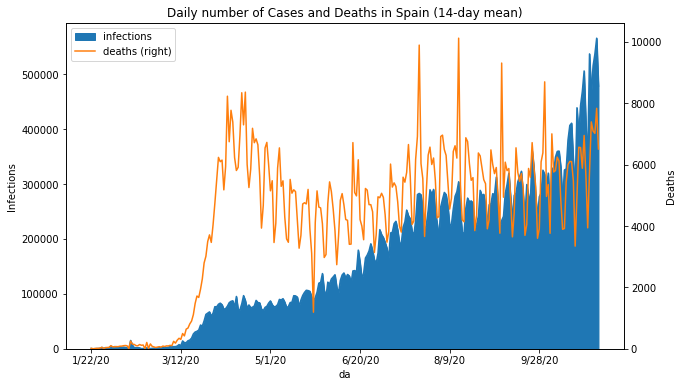

In [100]:
plt.figure(figsize=(10, 6),)
plt.title(title)

afgI= df_dataGlobal.infections.plot( x=xLabels, kind="area", legend=True)
afgI.set_ylabel("Infections")
afgI.set_ylim(bottom=0)
afgI.set_xlabel("da")

afgD = df_dataGlobal.deaths.plot( x=xLabels, secondary_y=True, kind="line", legend=True)
afgD.set_ylabel("Deaths")
afgD.set_ylim(bottom=0)

plt.show()